In [1]:
%run beam_simulator.py
%run visibility_simulator.py
%matplotlib inline
%run antpos

In [3]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt



In [9]:
freq =np.arange(100,200.0,0.1)

$\textbf{Quasi-Redundat Visibility Monte Carlo Simulation | Position Error}$

In [5]:
vis_pos_1p = np.load('vis_mc_simulation_postion_error_1p.npy')
vis_pos_10p = np.load('vis_mc_simulation_postion_error_10p.npy')
vis_pos_100p = np.load('vis_mc_simulation_postion_error_100p.npy')
vis_sim_true = np.load('vis_mc_simulation_postion_true_gp.npy')[0]

In [34]:
vis_rel_error_1pc = np.array([(vis_sim_true- vis_pos_1p[n_i])/vis_sim_true for n_i in range(vis_pos_1p.shape[0])])
vis_rel_error_10pc = np.array([(vis_sim_true- vis_pos_10p[n_i])/vis_sim_true for n_i in range(vis_pos_10p.shape[0])])
vis_rel_error_100pc = np.array([(vis_sim_true- vis_pos_100p[n_i])/vis_sim_true for n_i in range(vis_pos_100p.shape[0])])

$\textbf{Visibility Relative Error at 150 MHz}$

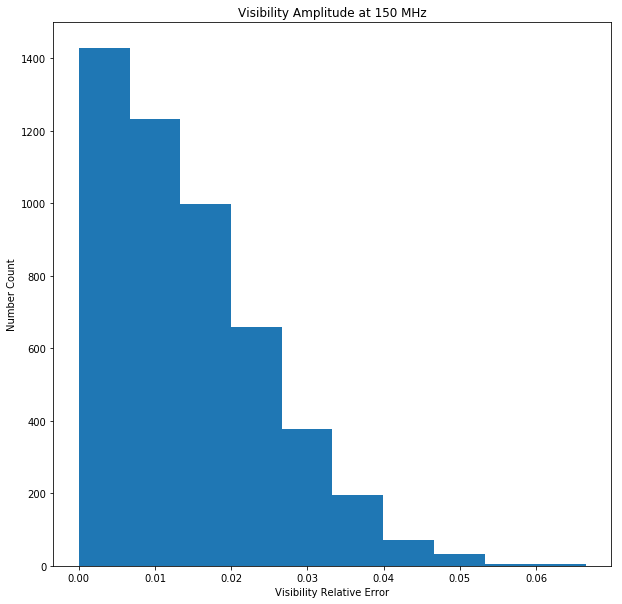

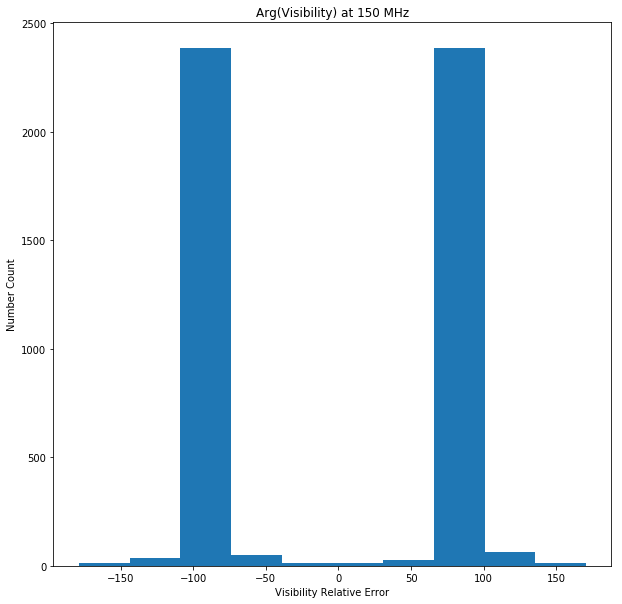

In [27]:
plt.figure(figsize=(10,10))
plt.title('Visibility Amplitude at 150 MHz')
plt.hist(np.abs(vis_rel_error_1pc[:,500]))
plt.ylabel('Number Count')
plt.xlabel('Visibility Relative Error')
plt.show()

plt.figure(figsize=(10,10))
plt.title('Arg(Visibility) at 150 MHz')
plt.hist(np.angle(vis_rel_error_1pc[:,500],deg=True))
plt.ylabel('Number Count')
plt.xlabel(r'Visibility Relative Error')
plt.show()

$\textbf{Standard Deviation of Visibility Relative Error | Position Errors}$

In [36]:
std_vis_rel_error_1pc = np.array([np.std(vis_rel_error_1pc[:,freq_i]) for freq_i in range(vis_rel_error_1pc.shape[1])])
std_vis_rel_error_10pc = np.array([np.std(vis_rel_error_10pc[:,freq_i]) for freq_i in range(vis_rel_error_10pc.shape[1])])
std_vis_rel_error_100pc = np.array([np.std(vis_rel_error_100pc[:,freq_i]) for freq_i in range(vis_rel_error_100pc.shape[1])])
freq =np.arange(100,200.0,0.1)



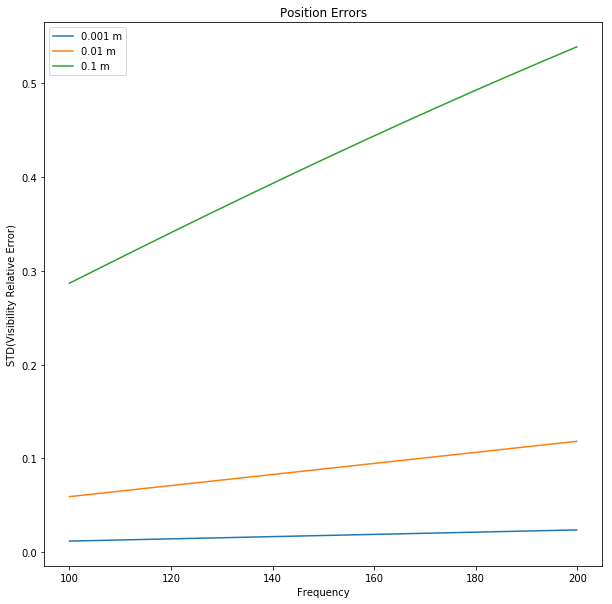

In [37]:
plt.figure(figsize=(10,10))
plt.title('Position Errors')
plt.plot(freq,std_vis_rel_error_1pc,label='0.001 m')
plt.plot(freq,std_vis_rel_error_10pc,label='0.01 m')
plt.plot(freq,std_vis_rel_error_100pc,label='0.1 m')
plt.xlabel('Frequency')
plt.ylabel(r'STD(Visibility Relative Error)')
plt.legend(loc='best')
plt.show()


$\textbf{Standard Deviation of Visibility Relative Error | Beam Pointing Errors}$

In [6]:
dfile_gb_pt_error =np.load('vis_mc_simulation_beam_pointing_error_gb.npy')
dfile_ad_pt_error =np.load('vis_mc_simulation_beam_pointing_error_ad.npy')
dfile_gb_bsize_error =np.load('vis_mc_simulation_beam_size_error_gb.npy')
dfile_ad_bsize_error =np.load('vis_mc_simulation_beam_size_error_ad_10pc.npy')

#dfile_gb_bsize_error =np.load('vis_mc_simulation_beam_size_error_gb_100pc.npy')
#dfile_ad_bsize_error =np.load('vis_mc_simulation_beam_size_error_ad_1pc.npyy')

vis_rel_pt_error_gb = np.array([(vis_sim_true- dfile_gb_pt_error[n_i])/vis_sim_true for n_i in range(dfile_gb_pt_error.shape[0])])
vis_rel_pt_error_ad = np.array([(vis_sim_true- dfile_ad_pt_error[n_i])/vis_sim_true for n_i in range(dfile_gb_pt_error.shape[0])])
vis_rel_gb_bsize_error_ = np.array([(vis_sim_true- dfile_gb_bsize_error[n_i])/vis_sim_true for n_i in range(dfile_gb_bsize_error.shape[0])])
vis_rel_ad_bsize_error_ = np.array([(vis_sim_true- dfile_ad_bsize_error[n_i])/vis_sim_true for n_i in range(dfile_ad_bsize_error.shape[0])])

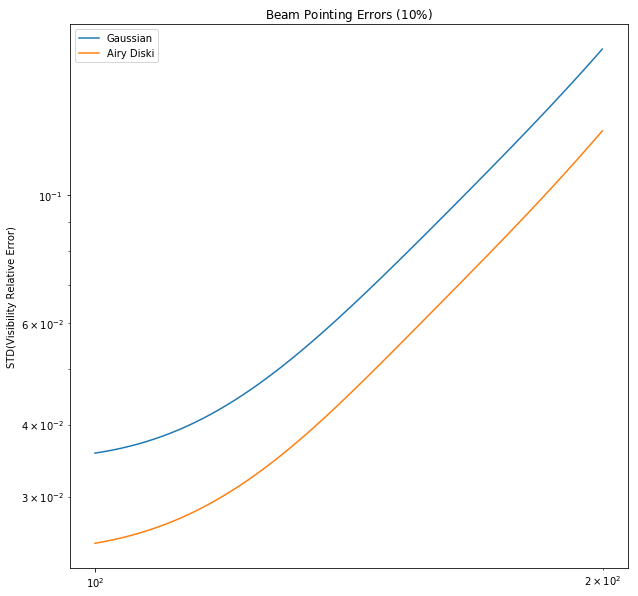

In [10]:
std_vis_pt_error_gb = np.array([np.std(vis_rel_pt_error_gb[:,freq_i]) for freq_i in range(dfile_gb_pt_error.shape[1])])
std_vis_pt_error_ad = np.array([np.std(vis_rel_pt_error_ad[:,freq_i]) for freq_i in range(dfile_ad_pt_error.shape[1])])




plt.figure(figsize=(10,10))
plt.title(r'Beam Pointing Errors (10$\%$)')
plt.loglog(freq,std_vis_pt_error_gb,label='Gaussian')
plt.loglog(freq,std_vis_pt_error_ad,label='Airy Diski')
plt.ylabel(r'STD(Visibility Relative Error)')
plt.legend(loc='best')
plt.show()


$\textbf{Standard Deviation of Visibility Relative Error | Beam Size Errors}$

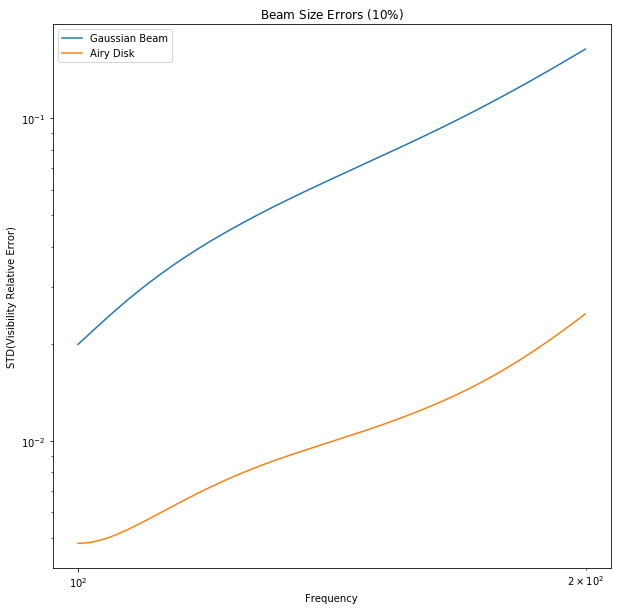

In [11]:


std_vis_bs_error_gb = np.array([np.std(vis_rel_gb_bsize_error_[:,freq_i]) for freq_i in range(vis_rel_gb_bsize_error_.shape[1])])
std_vis_bs_error_ad = np.array([np.std(vis_rel_ad_bsize_error_[:,freq_i]) for freq_i in range(vis_rel_ad_bsize_error_.shape[1])])



plt.figure(figsize=(10,10))
plt.title(r'Beam Size Errors (10$\%$)')
plt.loglog(freq,std_vis_bs_error_gb,label='Gaussian Beam')
plt.loglog(freq,std_vis_bs_error_ad,label='Airy Disk')

plt.xlabel('Frequency')
plt.ylabel(r'STD(Visibility Relative Error)')
plt.legend(loc='best')
plt.show()



$\textbf{ 1-D Delay PowerSpectrum}$